In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [171]:
product = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
product.head(1)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [172]:
customer = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")
customer.head(1)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [173]:
transaction = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Basic python case study\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")
transaction.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


In [174]:
cust_trans = pd.merge(left = customer, right = transaction, left_on = 'customer_Id', right_on = 'cust_id',how = 'outer')
customer_final = pd.merge(left = cust_trans, right = product, on = 'prod_cat_code', how = 'outer')
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12.0,Academic
2,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10.0,Non-Fiction
3,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11.0,Children
4,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3.0,Comics


### 2. Prepare a summary report for the merged data set.

In [175]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99434 entries, 0 to 99433
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99434 non-null  int64  
 1   DOB                99434 non-null  object 
 2   Gender             99394 non-null  object 
 3   city_code          99398 non-null  float64
 4   transaction_id     99293 non-null  float64
 5   cust_id            99293 non-null  float64
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  float64
 8   prod_cat_code      99293 non-null  float64
 9   Qty                99293 non-null  float64
 10  Rate               99293 non-null  float64
 11  Tax                99293 non-null  float64
 12  total_amt          99293 non-null  float64
 13  Store_type         99293 non-null  object 
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  float64
 16  prod_subcat        992

### Converting date from object to datetime

In [176]:
customer_final['DOB']=pd.to_datetime(customer_final.DOB)
customer_final['tran_date']=pd.to_datetime(customer_final.tran_date)

C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-01-1970' in DD/MM/YYYY format. Provide format or specif

### a . Get the column names and their corresponding data types

In [177]:
customer_final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id              float64
cust_id                     float64
tran_date            datetime64[ns]
prod_subcat_code            float64
prod_cat_code               float64
Qty                         float64
Rate                        float64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code           float64
prod_subcat                  object
dtype: object

###  b. Top/Bottom 10 observations

In [178]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,1970-02-01,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12.0,Academic
2,268408,1970-02-01,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10.0,Non-Fiction
3,268408,1970-02-01,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11.0,Children
4,268408,1970-02-01,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3.0,Comics
5,268408,1970-02-01,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,6.0,DIY
6,268159,1970-08-01,F,8.0,6.586740e+10,268159.0,2013-03-31,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,7.0,Fiction
7,268159,1970-08-01,F,8.0,6.586740e+10,268159.0,2013-03-31,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,12.0,Academic
8,268159,1970-08-01,F,8.0,6.586740e+10,268159.0,2013-03-31,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,10.0,Non-Fiction
9,268159,1970-08-01,F,8.0,6.586740e+10,268159.0,2013-03-31,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,11.0,Children


In [179]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99424,267982,1991-09-06,F,3.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99425,268789,1991-12-21,F,2.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99426,274298,1992-09-01,F,8.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99427,268631,1992-01-19,M,2.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99428,268019,1992-01-21,M,5.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99429,270232,1992-04-22,M,10.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99430,268693,1992-05-23,M,6.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99431,266947,1992-07-17,M,5.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99432,270973,1992-07-24,F,5.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99433,272125,1992-12-19,F,7.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max

In [180]:
customer_final.loc[:,['Qty','Rate','Tax','total_amt']].describe().T.iloc[:,3:8]

,min,25%,50%,75%,max
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,313.00,713.00,1109.000,1500.0
Tax,7.350,98.28,199.92,366.975,787.5
total_amt,-8270.925,762.45,1761.37,3585.725,8287.5


### d. Frequency tables for all the categorical variables

In [181]:
customer_final.loc[:,customer_final.dtypes == 'object'].describe().T

,count,unique,top,freq
Gender,99394,2,M,51117
Store_type,99293,4,e-Shop,40185
prod_cat,99293,6,Books,36414
prod_subcat,99293,18,Mens,7957


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

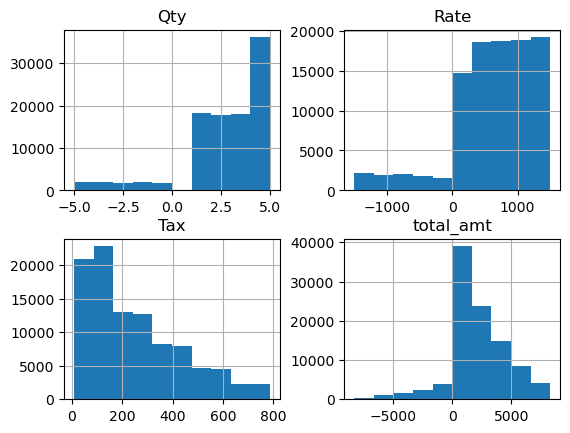

In [182]:
histo = customer_final.loc[:,['Qty','Rate','Tax','total_amt']].hist()

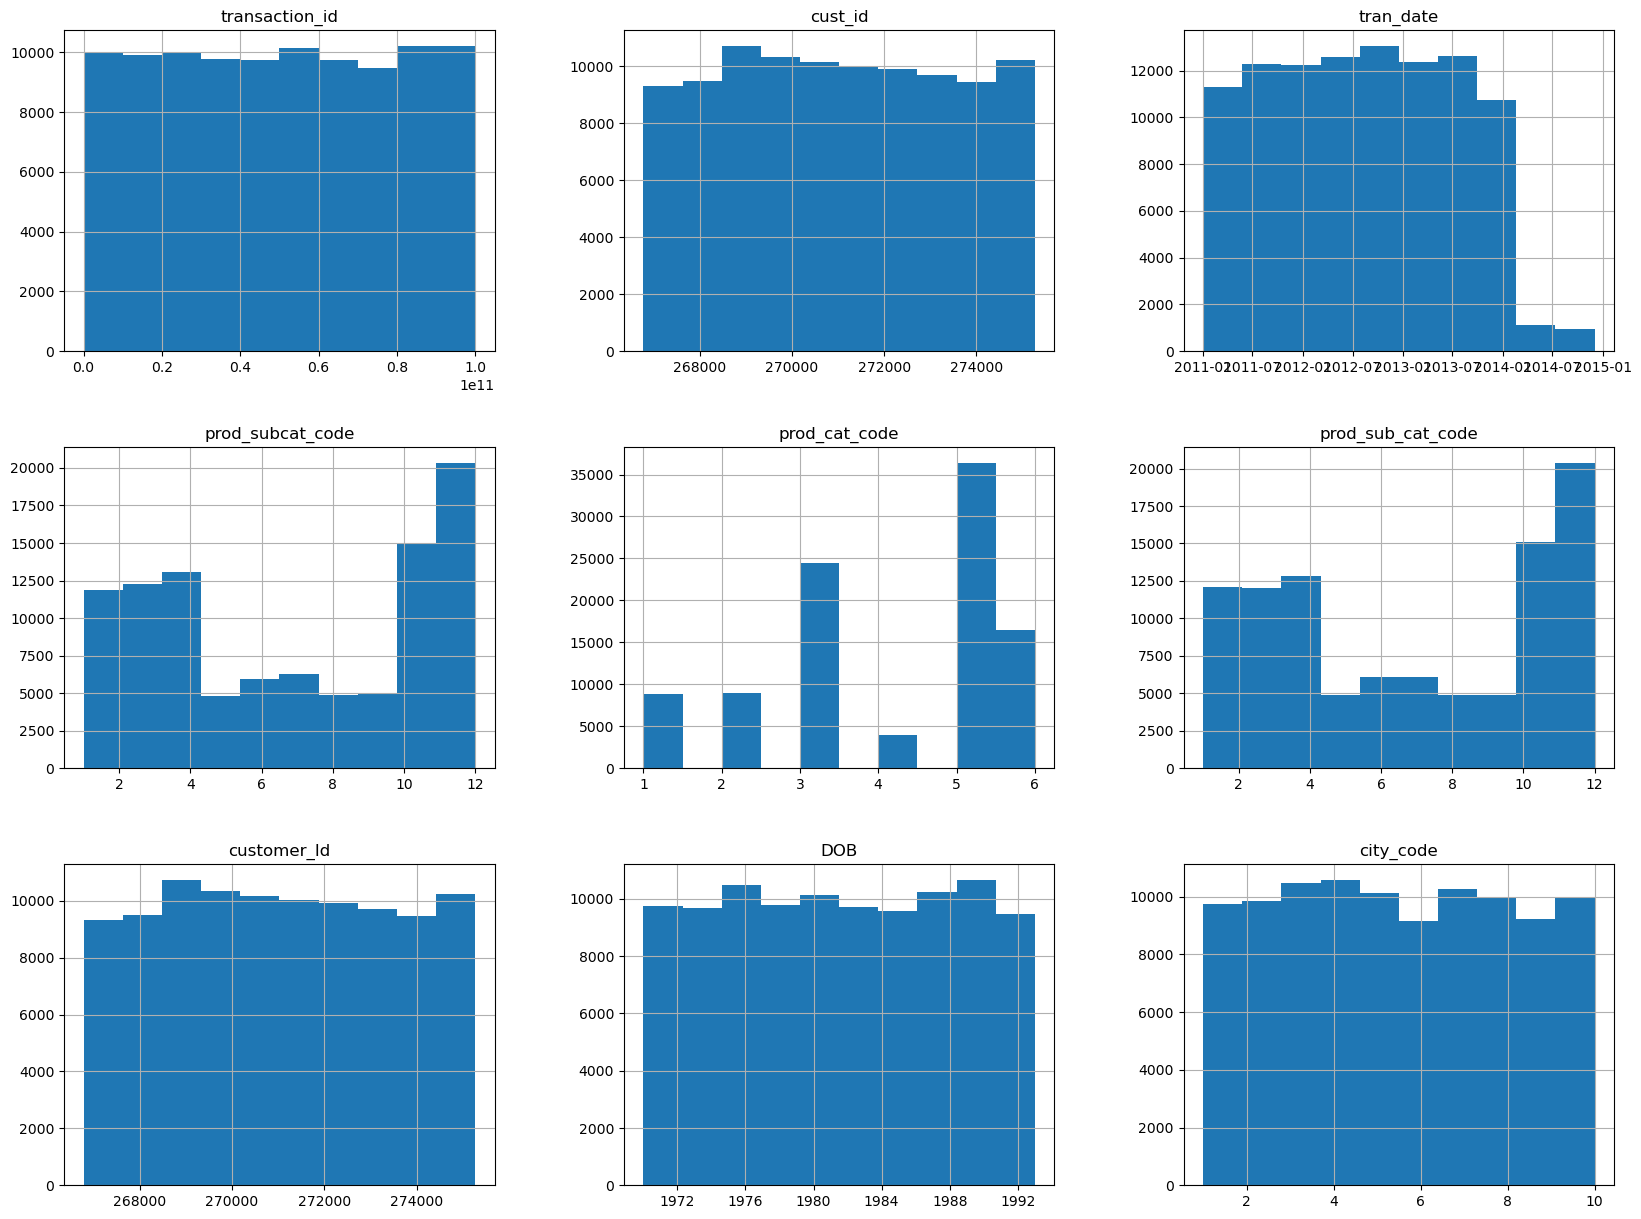

In [183]:
freq = customer_final.loc[:,["transaction_id",'cust_id','tran_date','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_sub_cat_code','prod_subcat','customer_Id','DOB','Gender','city_code']].hist(figsize=(20,15))

## 4. Calculate the following information using the merged dataset :
###    a. Time period of the available transaction data


In [184]:
t_period = max(customer_final.tran_date) - min(customer_final.tran_date)
in_years = (t_period.days/365.25)
in_years

3.915126625598905

### b. Count of transactions where the total amount of transaction was negative


In [185]:
customer_final['total_amt'].loc[customer_final.total_amt<0].count()

9294

### 5. Analyze which product categories are more popular among females vs male customers.

In [186]:
customer_final.groupby(['Gender','prod_cat'])[['prod_cat']].count()

prod_cat
Gender prod_cat                  
F      Bags                  1988
       Books                17694
       Clothing              4317
       Electronics          11640
       Footwear              4587
       Home and kitchen      7976
M      Bags                  2008
       Books                18696
       Clothing              4554
       Electronics          12850
       Footwear              4407
       Home and kitchen      8536

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [187]:
ccwmc = customer_final.groupby('city_code')[['customer_Id']].count().sort_values(by='customer_Id',ascending = False).iloc[0:1]
total_cust = customer_final.customer_Id.count()
per_cust_code_4 = (ccwmc/total_cust)*100
per_cust_code_4

,customer_Id
city_code,
4.0,10.644246


### 7. Which store type sells the maximum products by value and by quantity?

In [188]:
customer_final.groupby('Store_type')[['total_amt','Qty']].sum().sort_values(by = 'total_amt',ascending = False).iloc[0:1]

,total_amt,Qty
Store_type,,
e-Shop,85915747.84,98447.0


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [189]:
Elect_amt = customer_final.loc[(customer_final.Store_type == 'Flagship store')&(customer_final.prod_cat == 'Electronics')].total_amt.sum()
Cloth_amt = customer_final.loc[(customer_final.Store_type == 'Flagship store')&(customer_final.prod_cat == 'Clothing')].total_amt.sum()
Total_amount = Elect_amt + Cloth_amt
Total_amount

14658949.889999999

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [190]:
customer_final.loc[(customer_final.Gender == 'M')&(customer_final.prod_cat=='Electronics')].total_amt.sum()

28515547.125

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [191]:
pos_tran = customer_final.loc[(customer_final.Rate>0)]
no_tran = pos_tran.groupby('customer_Id')[['transaction_id']].count().sort_values(by = 'transaction_id',ascending = False)
more_than_10 = no_tran.loc[(no_tran.transaction_id>10)]
more_than_10.count()

transaction_id    4019
dtype: int64

## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [214]:
customer_final['age_tran']=customer_final.tran_date.dt.year - customer_final.DOB.dt.year
grp_age = customer_final.loc[(customer_final.age_tran>=25)&(customer_final.age_tran<=35)]
cat = grp_age.loc[(grp_age.prod_cat=='Electronics')|(grp_age.prod_cat=='Books')]
cat.total_amt.sum()

62175606.285

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [232]:
cat[cat.tran_date.between('2014-01-01','2014-03-01')].total_amt.sum()

1675731.395